In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def norm(x):
    return ((x-np.mean(x))/np.std(x))

In [3]:
def Cost(x,y,theta):
    a = np.power(((X @ theta.T)-y),2)
    return np.sum(a)/(2*len(x))

In [4]:
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = Cost(X, y, theta)
    return theta,cost

In [5]:
my_data = pd.read_csv(r"../Datasets/Linear Regression with Multiple Variables/home.txt",names=["size","bedroom","price"])

In [27]:
my_data.tail()

,size,bedroom,price
42,0.712618,1.090417,-0.211234
43,-1.007523,-0.223675,-0.331196
44,-1.445423,-1.537767,-1.283692
45,-0.187090,1.090417,-0.323998
46,-1.003748,-0.223675,-0.807044


<h2>Hi</h2>

In [7]:
my_data.std()

size          794.702354
bedroom         0.760982
price      125039.899586
dtype: float64

In [8]:
my_data = (my_data - my_data.mean())/my_data.std()
my_data.head()

,size,bedroom,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [9]:
data = np.matrix(np.loadtxt(r"../Datasets/Linear Regression with Multiple Variables/home.txt", delimiter=','))

In [10]:
new_data = np.copy(data)

In [11]:
new_data[:,0] = norm(data[:,0]).reshape(new_data[:,0].shape)

In [12]:
new_data[:,1] = norm(data[:,1].reshape(new_data[:,1].shape))

In [13]:
new_data[:,2] = norm(data[:,2].reshape(new_data[:,2].shape))

In [14]:
theta = np.zeros([1,3])

In [15]:
X = new_data[:,0:2]

In [16]:
y = new_data[:,2:3]

In [17]:
alpha = 0.015
iters = 1000

In [18]:
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

In [19]:
Cost(X,y,theta)

0.5

In [20]:
g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g)

[[-8.28592514e-17  8.84142127e-01 -5.25549586e-02]]


In [21]:
finalcost = Cost(X,y,g)
print(finalcost)

0.13352766224746407


Text(0.5,1,'Cost Function')

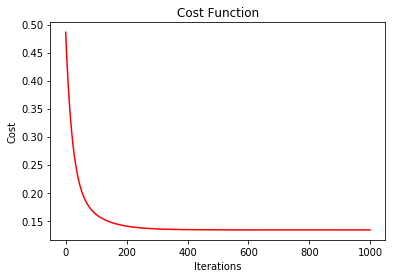

In [22]:
fig, ax = plt.subplots()
ax.plot(np.arange(iters),cost,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Cost Function')

In [26]:
cost.shape

(1000,)